In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import lightgbm as lgb
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score, KFold, TimeSeriesSplit

In [2]:
df=pd.read_parquet('df_new')
df

,open,high,low,close,maker fee,daily vol,BBANDS_upperband,BBANDS_middleband,BBANDS_lowerband,DEMA,...,Upper,Lower,buy_executed,sell_executed,buy_exit_date,exit_price_buy,y_buy,sell_exit_date,exit_price_sell,y_sell
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-02-23 05:50:00,49963.0,50600.0,48779.5,50060.0,-0.00025,0.029728,1565.719965,416.25,-733.219965,1207.837059,...,NaN,NaN,1,1,2021-02-23 06:35:00,50094.5,0.010622,2021-02-23 06:35:00,50094.5,-0.008070
2021-02-23 06:20:00,50842.0,51216.5,49530.0,50700.0,-0.00025,0.029862,809.986002,-288.85,-1387.686002,425.403967,...,51003.0,50094.5,1,0,2021-02-23 07:05:00,49562.0,-0.012327,2021-02-23 06:35:00,NaN,0.000000
2021-02-23 06:35:00,50700.0,50863.5,50005.0,50169.0,-0.00025,0.030253,469.817542,-457.05,-1383.917542,211.108081,...,50472.5,49562.0,1,0,2021-02-23 07:35:00,50166.5,0.010303,2021-02-23 07:05:00,NaN,0.000000
2021-02-23 07:05:00,49740.0,50465.0,49474.0,49860.5,-0.00025,0.030670,911.688266,69.70,-772.288266,501.199109,...,50166.5,49249.0,0,1,2021-02-23 07:35:00,NaN,0.000000,2021-02-23 07:50:00,49938.5,-0.007683
2021-02-23 07:35:00,50062.5,50560.5,49606.5,50558.0,-0.00025,0.030639,811.992971,186.00,-439.992971,318.906714,...,50868.0,49938.5,1,0,2021-02-23 08:05:00,49178.5,-0.017285,2021-02-23 07:50:00,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-16 00:20:00,22650.5,22694.0,22398.0,22555.0,0.00010,0.053747,145.796931,39.90,-65.996931,-189.536198,...,22797.5,22070.0,0,1,2022-06-16 00:35:00,NaN,0.000000,2022-06-16 01:05:00,22771.0,-0.001669
2022-06-16 00:35:00,22555.0,22877.5,22464.5,22527.5,0.00010,0.054057,10.670640,-101.20,-213.070640,-266.317196,...,22771.0,22040.5,0,1,2022-06-16 01:05:00,NaN,0.000000,2022-06-16 01:05:00,NaN,0.000000
2022-06-16 01:05:00,22667.5,23032.5,22424.5,22951.5,0.00010,0.054733,239.011717,-91.70,-422.411717,-228.163243,...,23202.5,22449.0,1,0,2022-06-16 01:20:00,NaN,0.000000,2022-06-16 01:20:00,NaN,0.000000


In [5]:
model=lgb.LGBMRegressor(n_jobs=-1,random_state=1)
#model=BaggingRegressor(model,random_state=1,n_jobs=1)
features = ['ADX', 'APO', 'AROONOSC', 'AROON_aroondown', 'AROON_aroonup', 'ATR',
       'BBANDS_lowerband', 'BBANDS_middleband', 'BBANDS_upperband', 'BETA',
       'CCI', 'DX', 'EMA', 'HT_TRENDMODE', 'KAMA', 'LINEARREG',
       'LINEARREG_ANGLE', 'LINEARREG_INTERCEPT', 'LINEARREG_SLOPE', 'MA','MIDPOINT', 'MOM', 'RSI', 'STDDEV', 'STOCHF_fastk',
       'STOCH_slowd', 'STOCH_slowk', 'T3', 'TRIMA', 'ULTOSC', 'WILLR', 'WMA']

In [6]:
model.fit(df[features], np.arange(df.shape[0]))

LGBMRegressor(random_state=1)

In [7]:
lgbm_adv_importance = model.feature_importances_

In [8]:
lgbm_adv_importance

array([262, 208, 109,  23,  22, 381,  51,  14,  34, 133,  60, 203, 128,
        35, 168,  56,  69,  49,   0,  68,  85,  47, 193, 103,  66,  89,
        36,  37,  55, 132,  61,  23], dtype=int32)

In [9]:
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_, features)), columns=['Value','Feature'])
feature_imp

,Value,Feature
0,0,LINEARREG_SLOPE
1,14,BBANDS_middleband
2,22,AROON_aroonup
3,23,AROON_aroondown
4,23,WMA
5,34,BBANDS_upperband
6,35,HT_TRENDMODE
7,36,STOCH_slowk
8,37,T3
9,47,MOM


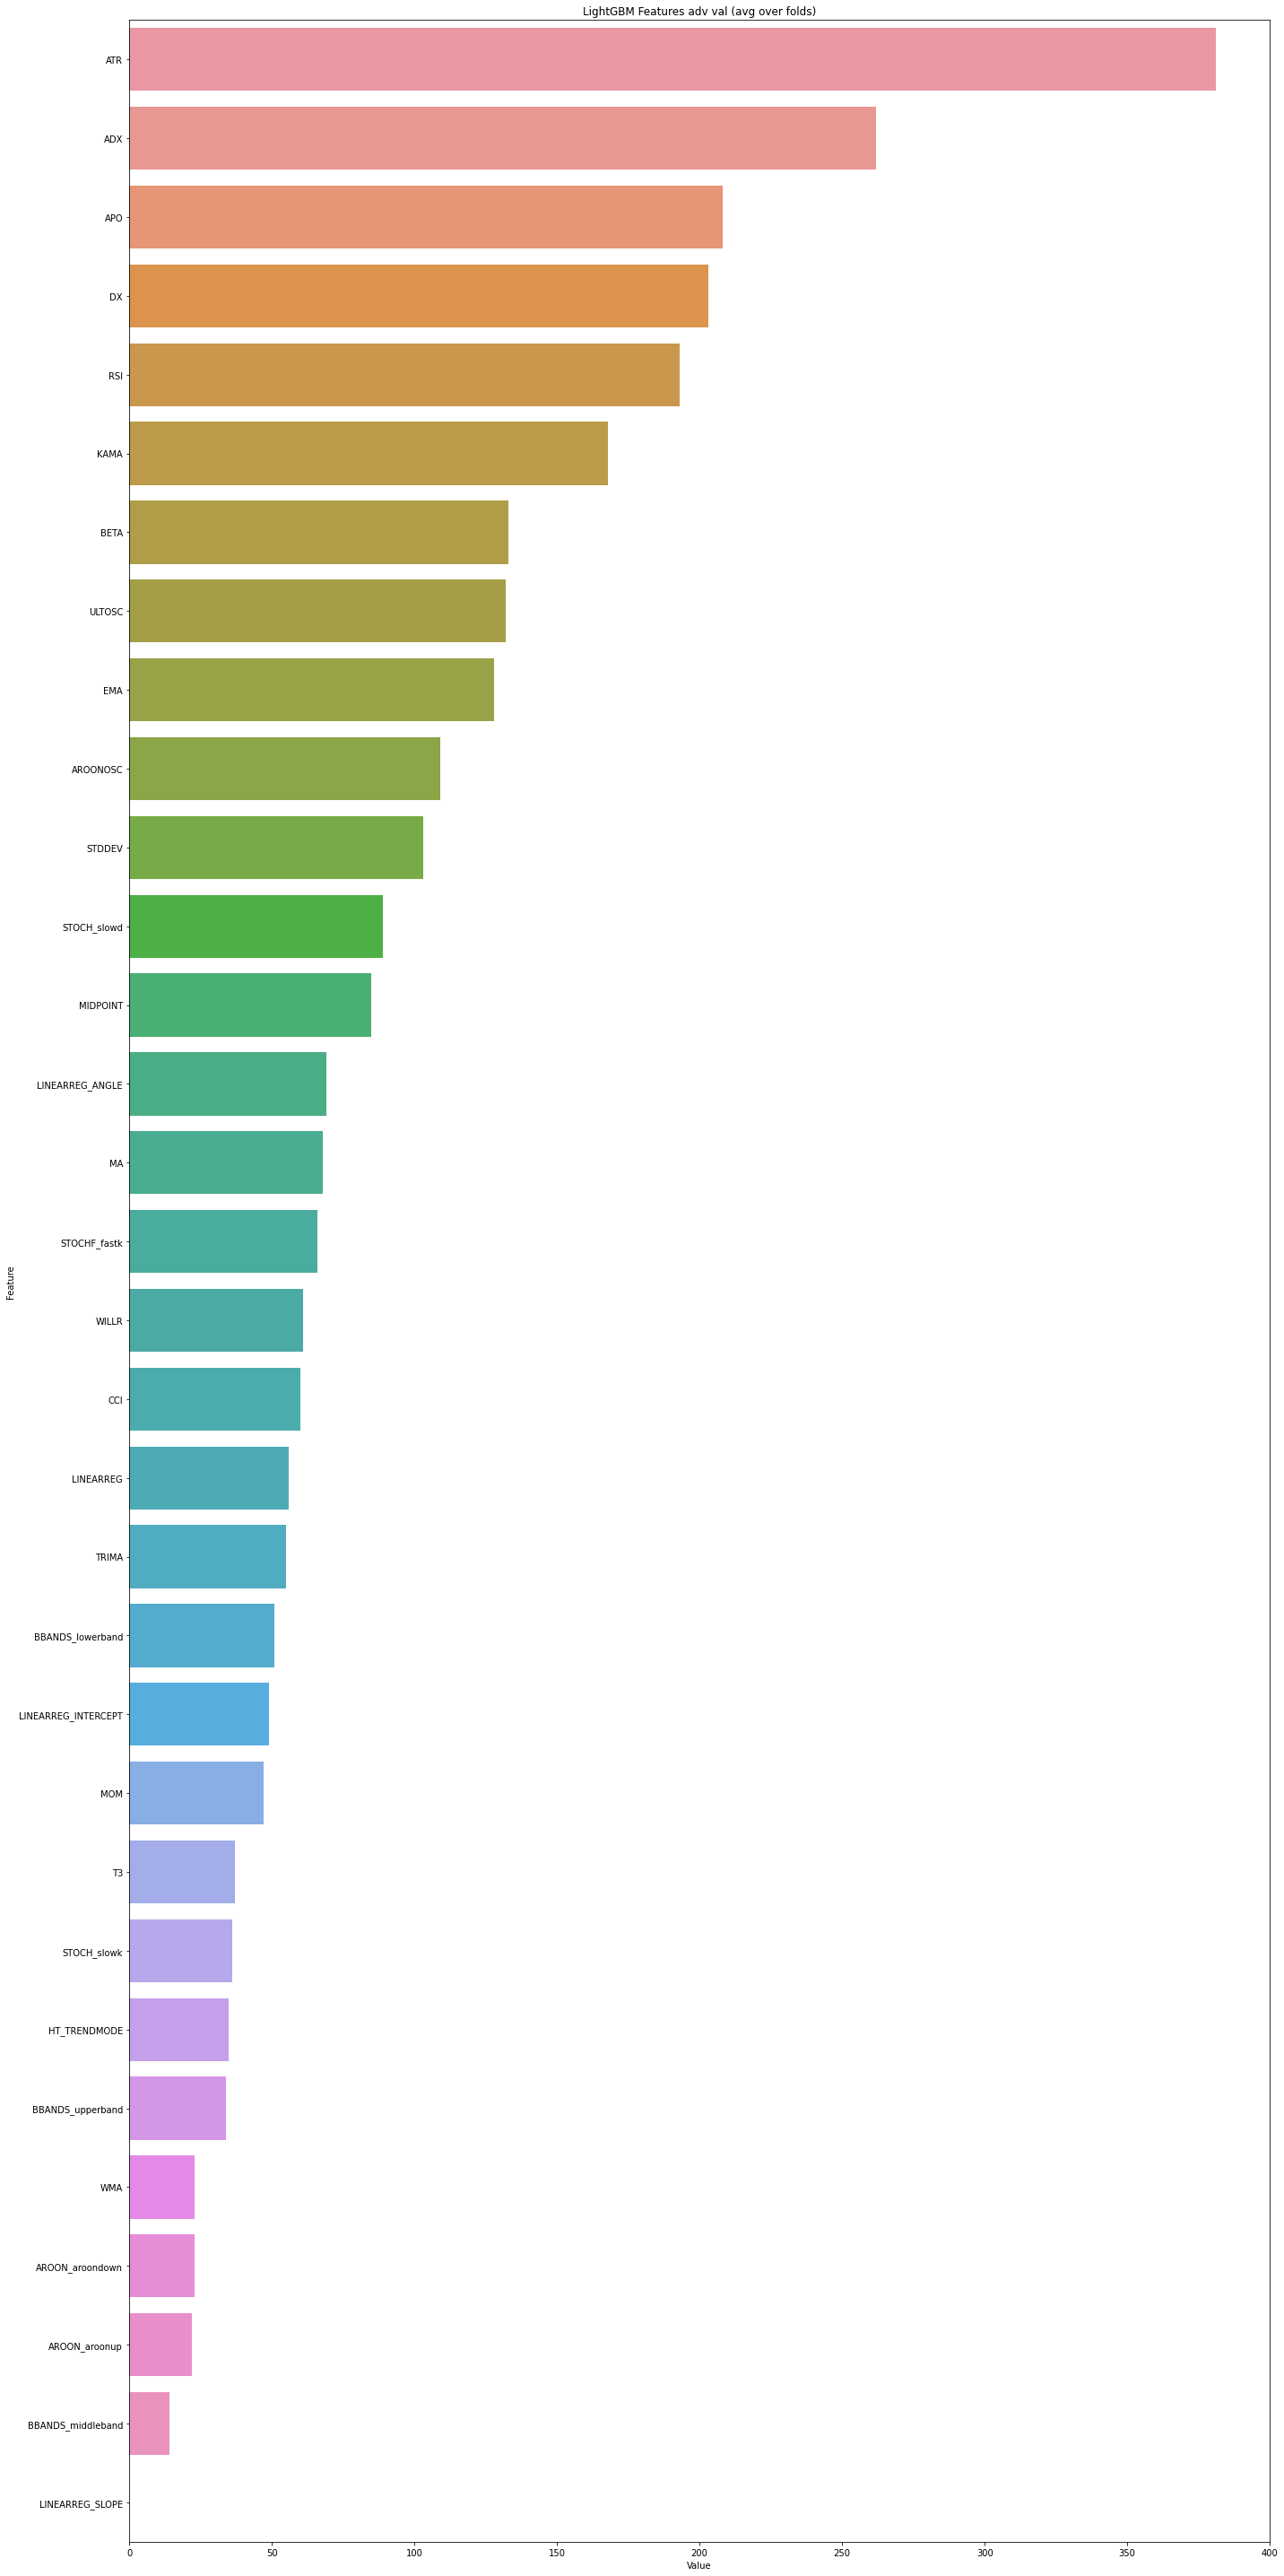

スコア計算。スコアが高いと汎化性能が悪い可能性ある
scores [0.23059874 0.22490602]


In [13]:
plt.figure(figsize=(20, 40))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features adv val (avg over folds)')
plt.tight_layout()
plt.show()

cv = KFold(n_splits=2, shuffle=True, random_state=0)
scores = cross_val_score(model, df[features], np.arange(df.shape[0]), scoring='r2', cv=cv)
print('scores', scores)
#print('score mean, std', np.mean(scores), np.std(scores))